# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

In [2]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:

#should return 9 names
north_df['Rep ID'].unique()


array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
#should return 11 names
south_df['Rep ID'].unique()


array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:

north_df.describe().round(2)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.00,245.00,245.00,245.00,245.00,82.00,245.00,245.0
mean,122.00,0.02,0.03,9.99,1.91,3.05,2.97,1.0
std,70.87,0.14,0.17,1.40,0.77,1.46,0.84,0.0
min,0.00,0.00,0.00,8.00,1.00,1.00,2.00,1.0
25%,61.00,0.00,0.00,9.00,1.00,2.00,2.00,1.0
50%,122.00,0.00,0.00,10.00,2.00,3.00,3.00,1.0
75%,183.00,0.00,0.00,11.00,3.00,4.00,4.00,1.0
max,244.00,1.00,1.00,12.00,3.00,5.00,4.00,1.0


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:

south_df.describe().round(2)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.00,314.00,314.00,314.00,314.00,126.00,314.00,314.0
mean,156.50,0.04,0.01,10.05,1.91,3.00,3.08,1.0
std,90.79,0.18,0.11,1.41,0.86,1.31,0.82,0.0
min,0.00,0.00,0.00,8.00,1.00,1.00,2.00,1.0
25%,78.25,0.00,0.00,9.00,1.00,2.00,2.00,1.0
50%,156.50,0.00,0.00,10.00,2.00,3.00,3.00,1.0
75%,234.75,0.00,0.00,11.00,3.00,4.00,4.00,1.0
max,313.00,1.00,1.00,12.00,3.00,5.00,4.00,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# Code Used

#join north_df and south_df

combined_df = pd.concat([north_df, south_df])

#value counts

combined_df['Time Block'].value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = Brent, Lilly, Todd, Duke, Joe, Cam, Xander, Amanda, Andy
- 1b) Reps in the South Branch = Eric, Randy, Sandy, Helga, Kate, George, Karl, Susan, Josh, Sharon, Alice


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There are null values under 'Incoming Wait Time.' Since these values can be attributed to either outgoing calls, or incoming calls where a rep was ready immediately, they will be replaced with '0'.

In [9]:
# Code Used
# Add Additional Cells as needed.
# Start with north_df, find some nulls
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [10]:
# Identify null values in 'Incoming Wait Time'. These are mostly calls that had no wait time due to either 
# a rep being ready right away, or an outgoing call. Will change these nulls to '0'

# Check nulls
north_df.value_counts('Incoming Wait Time', dropna = False)

# Replace nulls with '0'

north_df['Incoming Wait Time'].fillna(0, inplace = True)

In [11]:
# Check work

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [12]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     245 non-null    float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [13]:
# Find nulls in south_df
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [14]:
# Identify null values in 'Incoming Wait Time'. These are mostly calls that had no wait time due to either 
# a rep being ready right away, or an outgoing call. Will change these nulls to '0'

# Check nulls
south_df.value_counts('Incoming Wait Time', dropna = False)

# Replace nulls with '0'

south_df['Incoming Wait Time'].fillna(0, inplace = True)

In [15]:
#Check work

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [16]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     314 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: First I identify the row that is categorizing their sale uniquely. I did this by creating two new data sets, one where 'Sale' did not equal no, which gave 11 results, and one where 'Sale' equalled yes, which returned 10 results. I merged the two new datasets together, only calling the rows that were not in both rows, which gave me one row, row 19. I then realized there were extra spaces in the answer, so I stripped the entire column, so the entire column had 'yes' or 'no'.

In [17]:
#Code Used
# Add Additional Cells as needed.
north_df.value_counts('Sale')

Sale
NO      234
YES      10
YES       1
dtype: int64

In [18]:
# Find the rows that have 'Yes' in the sale column

north_df_1 = north_df[north_df['Sale'] != 'NO']

# Shows all 11 rows that have a sale, but there is no noticable difference

In [19]:
north_df_2 = north_df[north_df['Sale'] == 'YES']

In [20]:
# Identify all rows in north_df_1 that do not have a match in north_df_2

north_df_1[~north_df_1.isin(north_df_2)].dropna()

# Identifies row 19 as the only row that is not in both datasets

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
19,19.0,North,Sales Support,10:00 AM,Incoming,B,Lilly,YES,0.0,0.0,11.0,2.0,2.0,4.0,1.0


In [21]:
north_df['Sale'] = north_df['Sale'].str.strip()

In [22]:
#Check my work

north_df.value_counts('Sale')

Sale
NO     234
YES     11
dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I found no duplicate rows in either data set. 

In [23]:
#Code Used
# Add Additional Cells as needed.

#Search for duplicates in north_df

north_df['Duplicated'] = north_df.duplicated(keep ='first')

north_df.value_counts('Duplicated')

# No duplicate rows found in north_df

Duplicated
False    245
dtype: int64

In [24]:
#Search for duplicates in south_df

south_df['Duplicated'] = south_df.duplicated(keep ='first')

south_df.value_counts('Duplicated')

# No duplicate rows found in south_df

Duplicated
False    314
dtype: int64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I dropped the first column, 'Unnamed: 0' in both datasets. The information in this row is redundent, since python lists the row index automatically.  

In [25]:
#Code Used
# Add Additional Cells as needed.

# Drop column 'Unnamed: 0', just numbers columns and is repeated info

north_df = north_df.drop('Unnamed: 0', axis = 1)

north_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Duplicated
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,False
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,False
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,False
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,False
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1,False
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1,False
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1,False
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1,False


In [26]:
south_df.value_counts('Unnamed: 0')

# Drop column 'Unnamed: 0', just numbers columns and is repeated info

south_df = south_df.drop('Unnamed: 0', axis = 1)

south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Duplicated
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,False
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,False
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,False
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,False
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1,False
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1,False
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1,False
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1,False


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [27]:
# Create dataframe for the entire company named df

df = pd.merge(north_df, south_df, how = 'outer')


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls


In [28]:
# Code Used
# Add Additional Cells as needed.

#Group by Rep Id, north_df

north_group = north_df.groupby(['Rep ID']).sum()

# Sort by number of calls

north_group.sort_values(['Calls'], ascending = False)

C:\Users\molli\AppData\Local\Temp\ipykernel_17220\3140756407.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_group = north_df.groupby(['Rep ID']).sum()


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Duplicated
Rep ID,,,,,,,,
Brent,0,1,362,71,17.0,117,37,0
Lilly,0,2,307,59,37.0,88,30,0
Duke,2,0,292,56,39.0,85,29,0
Todd,1,0,296,58,21.0,97,29,0
Joe,0,0,256,49,36.0,81,26,0
Cam,1,0,233,46,32.0,66,24,0
Xander,1,0,244,44,20.0,68,24,0
Amanda,0,1,229,43,12.0,60,23,0
Andy,0,3,228,43,36.0,65,23,0


In [29]:
#Group by Rep Id, south_df

south_group = south_df.groupby(['Rep ID']).sum()

# Sort by number of calls

south_group.sort_values(['Calls'], ascending = False)

C:\Users\molli\AppData\Local\Temp\ipykernel_17220\324614952.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_group = south_df.groupby(['Rep ID']).sum()


,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Duplicated
Rep ID,,,,,,,,
Eric,0,0,361,54,47.0,112,35,0
Randy,3,1,320,66,47.0,98,33,0
Sandy,1,0,325,60,34.0,100,32,0
Helga,0,2,292,58,36.0,95,31,0
George,0,0,298,53,41.0,87,29,0
Kate,0,0,291,61,37.0,83,29,0
Karl,1,0,287,61,26.0,85,28,0
Josh,3,0,260,50,31.0,83,26,0
Susan,2,0,267,53,35.0,88,26,0


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? Technically, both the South Branch and company wide abandonment rates fall outside of optimal range of 2-5%. However, since both of these scores fall below the optimal range, and we ideally don't want any calls abandoned, I would say all three scores are excellent. 

In [30]:
# Code Used
# Add Additional Cells as needed.

# north_df

north_df['Abandoned'].mean().round(4)*100

2.86

In [31]:
# south_df

south_df['Abandoned'].mean().round(4)*100

1.27

In [32]:
# Both Branches

df['Abandoned'].mean().round(4)*100

1.97

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 196, 80%
- South Branch = 236, 75.16%
- Company Wide = 432, 77.28%

In [33]:
# Code Used
# Add Additional Cells as needed.

# Number of calls in north_df answered in 2 seconds

north_calls_under_2 = len(north_df[north_df['Incoming Wait Time'] <= 2])
north_calls_under_2

196

In [34]:
# Percentage of calls in north_df answered in 2 seconds, rounded to 100th

round((north_calls_under_2/len(north_df) * 100), 2)

80.0

In [35]:
# Number of calls in south_df answered in 2 seconds

south_calls_under_2 = len(south_df[south_df['Incoming Wait Time'] <= 2])
south_calls_under_2

236

In [36]:
# Percentage of calls in south_df answered in 2 seconds, rounded to 100th

round((south_calls_under_2/len(south_df) * 100), 2)


75.16

In [37]:
# number of calls company wide answered in 2 seconds

df_calls_under_2 = len(df[df['Incoming Wait Time'] <= 2])
df_calls_under_2

432

In [38]:
# Percentage of calls company wide answered in 2 seconds, rounded to 100th

round((df_calls_under_2/len(df) * 100), 2)

77.28

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02 seconds
- South Branch in seconds = 1.20 seconds
- Company Wide in seconds = 1.12 seconds


In [39]:
# Code Used 
# north df avg speed of answer

north_mean = north_df['Incoming Wait Time'].mean().round(2)
north_mean

1.02

In [40]:
# south df avg speed of answer
south_mean = south_df['Incoming Wait Time'].mean().round(2)
south_mean

1.2

In [41]:
# Company wide avg speed of answer

df_mean=df['Incoming Wait Time'].mean().round(2)
df_mean

1.12

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to present this information in a bar graph to easily compare abandonment rates between different queues.

C:\Users\molli\AppData\Local\Temp\ipykernel_17220\3551592421.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


Text(0.5, 1.0, 'Abandonment Rate per Queue')

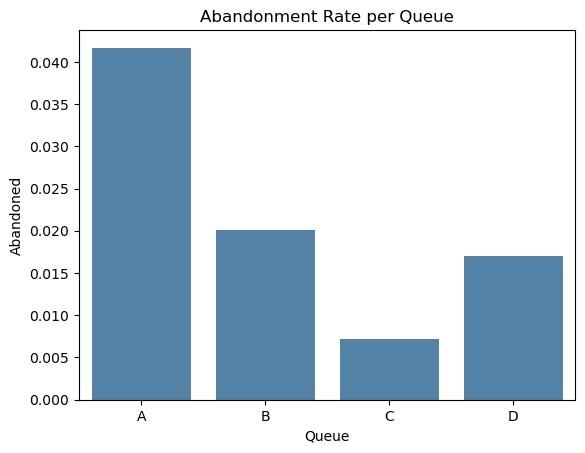

In [42]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

sns.barplot(data=df, x="Queue", y="Abandoned", errorbar=None, order=queues, palette = ['steelblue'])
plt.title('Abandonment Rate per Queue',color = 'black')



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I decided to split this question into two visualizations, since there wasn't a clear correlation between the two sets of information. Each graph set of information was presented in a bar graph, because I was easily able to show comparisions between the data. 

Text(0, 0.5, 'Service Level %')

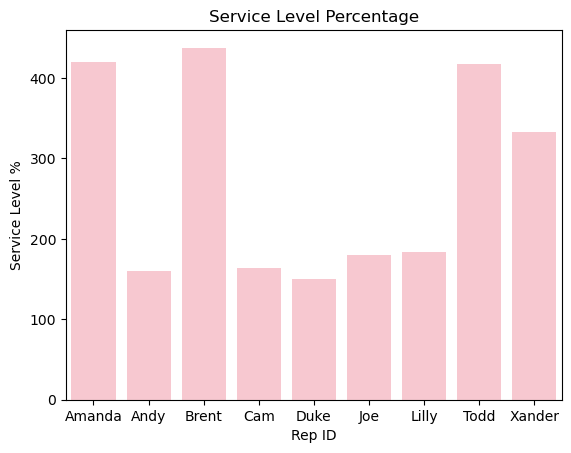

In [43]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level = service_level.reset_index()

#The results from the service level %

sns.barplot(data=service_level, x="Rep ID", y="Service Level %", palette = ['pink'])
plt.title('Service Level Percentage')
plt.xlabel('Rep ID')
plt.ylabel('Service Level %')

Text(0, 0.5, 'Number of Calls')

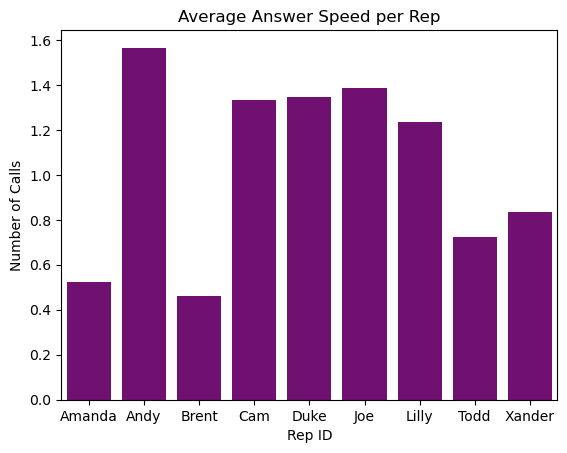

In [44]:
# Chart for average answer speed

sns.barplot(data=north_plt, x="Rep ID", y="Incoming Wait Time", palette = ['purple'])
plt.title('Average Answer Speed per Rep',color = 'black')
plt.ylabel('Number of Calls')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose to present this informatin in a grouped bar chart. This way I could have the information grouped by the call's purpose, and compare side to side how many in each category are incoming or outcoming. 

      Call Purpose Incoming or Outgoing  count
0        Complaint             Incoming     51
1  Product Support             Outgoing    228
2  Product Support             Incoming     82
3    Sales Support             Outgoing    123
4    Sales Support             Incoming     75


Text(51.97053047839506, 0.5, 'Number of Calls')

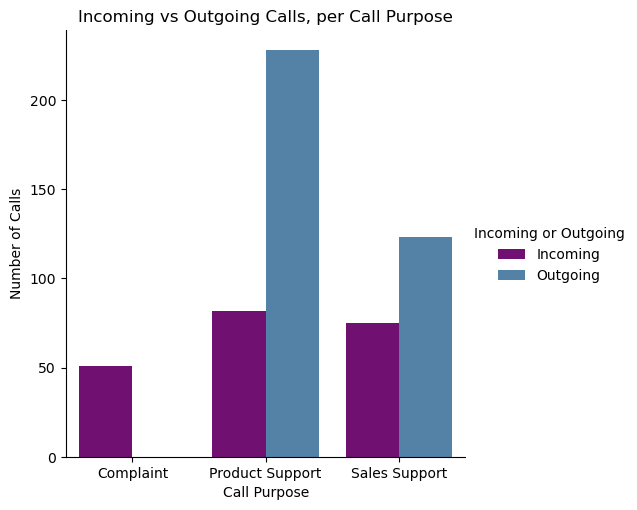

In [45]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose", as_index = False)
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

sns.catplot(data = purpose_counts, kind = 'bar', x="Call Purpose", y = 'count', hue = 'Incoming or Outgoing', errorbar='sd', order=call_purpose, palette=['purple', 'steelblue'])
plt.title('Incoming vs Outgoing Calls, per Call Purpose',color = 'black')
plt.ylabel('Number of Calls')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: In my opinion, the south branch is operating more efficiently. Their abandoned rate is well below what their goal is,and are answering calls slightly slower, while answering more calls per rep. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North Branch has fewer reps and a higher average abandoned call rate. The North Branch should receive the new hires


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Knowing what company the call center works for, or at least what products they sell, or the field, would be helpful to know. It would give context as to what the calls are regarding, and how long we should expect a call to take. For example, a company selling medical equipment would have more technical, and longer calls than a company selling board games. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [46]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: